<a href="https://colab.research.google.com/github/lazarinastoy/pytrends/blob/main/Pytrends_ultimateguide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Export Trending Data from Today's Searches

In [86]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()

#get today's treniding topics
trendingtoday = pytrend.today_searches(pn='US')
trendingtoday.head(20)

0                  Meta
1    Jada Pinkett Smith
2         Dorit Kemsley
3    Hazard High School
4                  Nets
5         Brandin Cooks
6          James Harden
7            LCID stock
8      Claressa Shields
9          Sitting Bull
Name: query, dtype: object

# How to export Trend Data of Interest for Keywords by Region

In [1]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
#provide your search terms
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
#get interest by region for your search terms
pytrend.build_payload(kw_list=kw_list)
df = pytrend.interest_by_region()
df.head(10)

,Facebook,Apple,Amazon,Netflix,Google
geoName,,,,,
Afghanistan,0,0,0,0,0
Albania,0,0,0,0,0
Algeria,0,0,0,0,0
American Samoa,0,0,0,0,0
Andorra,0,0,0,0,0
Angola,0,0,0,0,0
Anguilla,0,0,0,0,0
Antarctica,0,0,0,0,0
Antigua & Barbuda,0,0,0,0,0


# How to Export trending Searches in a Specific Country

In [2]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
# Get realtime Google Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Jada Pinkett Smith
1,Dorit Kemsley
2,Ford stock
3,Brandin Cooks
4,Merrick Garland


# How to Get Keyword Suggestions

In [10]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()


# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Facebook')
df = pd.DataFrame(keywords)
df.head(5)

,mid,title,type
0,/m/02y1vz,Facebook,Social networking service
1,/m/0hmyfsv,Facebook,Social networking service company
2,/m/0k2ljgx,Facebook Messenger,Topic
3,/m/0102936k,Oculus VR,Company
4,/g/112yf7vdx,Jogo Aberto,Television program


# How to Get Related Queries / Topics + Download them as CSV


In [83]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
#provide your search terms
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
pytrend.build_payload(kw_list=kw_list)
#get related queries
related_queries = pytrend.related_queries()
related_queries.values()


#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names

allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 

#check your dataset
allqueries.head(50)

#save to csv
allqueries.to_csv('allqueries.csv')

#download from collab
from google.colab import files
files.download("allqueries.csv")


## How to Get Search Interest per region & Historical

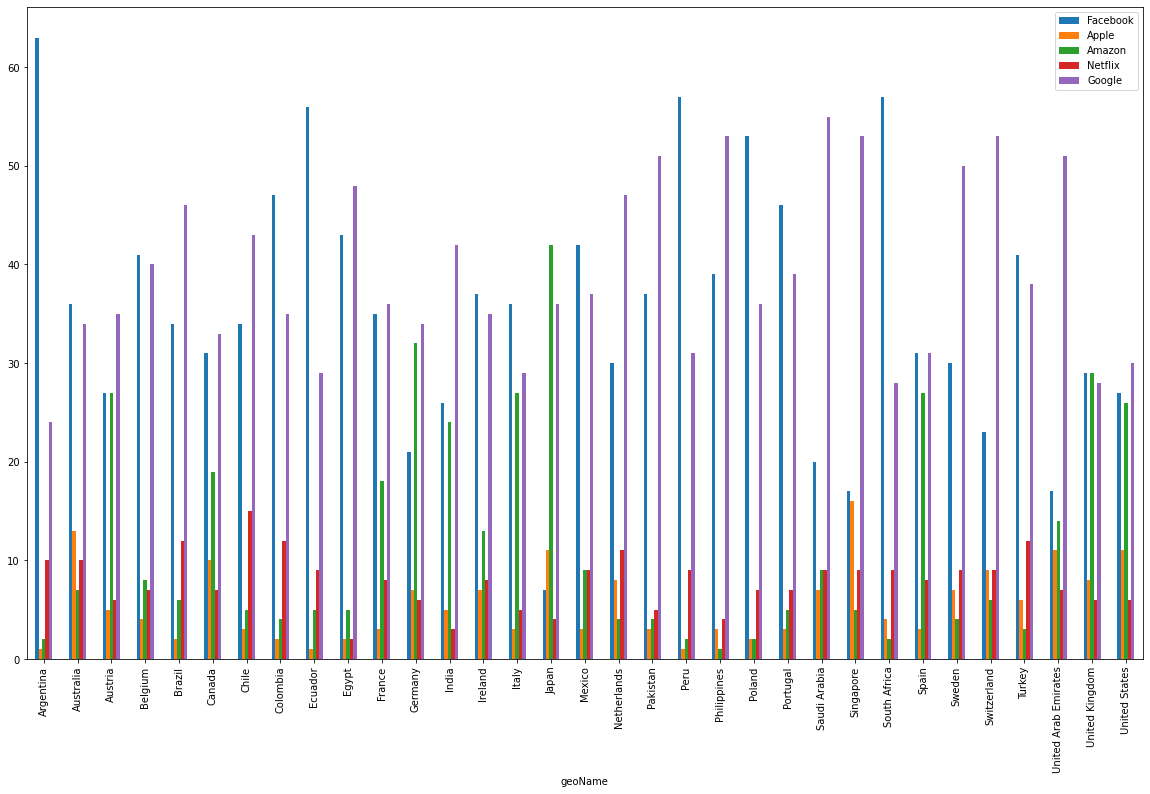

In [94]:
#install pytrends
!pip install pytrends
#import the libraries
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
#provide your search terms
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']


#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pytrend.interest_by_region()

#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')


In [97]:
#historical interest
historicaldf = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=10, day_start=1, hour_start=0, year_end=2021, month_end=10, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

#visualise
#plot a timeseries chart
historicaldf.plot(figsize=(20, 12))

#plot seperate graphs, using theprovided keywords
historicaldf.plot(subplots=True, figsize=(20, 12))


HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConne

KeyboardInterrupt: ignored